# Backtesting a Simple Strategy

In [4]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt

### 1. Download data for the gold ETF GLD

In [5]:
date = '20140101'
gld = pdr.get_data_yahoo('GLD', start=date)
gld.drop('Adj Close', axis=1, inplace=True)

### 2. Add MA and instantaneous rate of return

In [6]:
gld['9_day'] = gld.Open.rolling(9).mean()
gld['21_day'] = gld.Open.rolling(21).mean()
gld['Return'] = np.log(gld.Close).diff()
gld.head()

,High,Low,Open,Close,Volume,9_day,21_day,Return
Date,,,,,,,,
2014-01-02,118.730003,117.750000,117.930000,118.000000,7551000,NaN,NaN,NaN
2014-01-03,119.620003,118.589996,118.639999,119.290001,5874400,NaN,NaN,0.010873
2014-01-06,120.389999,117.110001,119.760002,119.500000,10106500,NaN,NaN,0.001759
2014-01-07,118.919998,118.129997,118.459999,118.820000,6433700,NaN,NaN,-0.005707
2014-01-08,118.519997,117.500000,117.989998,118.120003,7428500,NaN,NaN,-0.005909


In [8]:
gld.dropna(inplace=True)
gld.head()

,High,Low,Open,Close,Volume,9_day,21_day,Return
Date,,,,,,,,
2014-01-31,120.860001,119.459999,120.650002,120.089996,7983100,120.821112,119.913810,0.002668
2014-02-03,122.110001,120.320000,120.470001,121.320000,9267300,120.958889,120.034762,0.010190
2014-02-04,121.089996,120.389999,120.410004,120.989998,7027400,121.043334,120.119048,-0.002724
2014-02-05,121.879997,120.730003,121.760002,121.290001,6800000,121.131112,120.214286,0.002476
2014-02-06,121.510002,120.779999,121.379997,121.239998,4745800,121.055556,120.353334,-0.000412


### 3. Plot data and signals

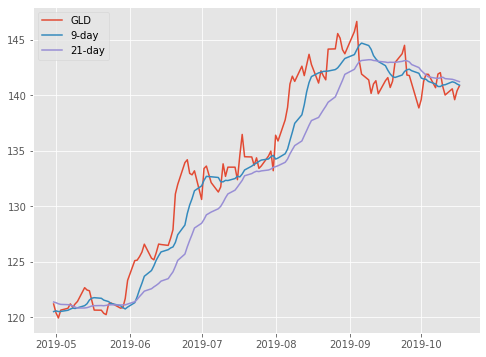

In [10]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    plt.plot(gld.Close[-120:], label='GLD')
    plt.plot(gld['9_day'][-120:], label='9-day')
    plt.plot(gld['21_day'][-120:], label='21-day')
    plt.legend(loc=2)

### 4. Code regime -- always long or short

In [12]:
gld['regime']  = np.where(gld['9_day'] > gld['21_day'], 1, -1)

### 5. Calculate return

In [13]:
gld['strat_return'] = gld.Return * gld.regime
gld.head()

,High,Low,Open,Close,Volume,9_day,21_day,Return,regime,strat_return
Date,,,,,,,,,,
2014-01-31,120.860001,119.459999,120.650002,120.089996,7983100,120.821112,119.913810,0.002668,1,0.002668
2014-02-03,122.110001,120.320000,120.470001,121.320000,9267300,120.958889,120.034762,0.010190,1,0.010190
2014-02-04,121.089996,120.389999,120.410004,120.989998,7027400,121.043334,120.119048,-0.002724,1,-0.002724
2014-02-05,121.879997,120.730003,121.760002,121.290001,6800000,121.131112,120.214286,0.002476,1,0.002476
2014-02-06,121.510002,120.779999,121.379997,121.239998,4745800,121.055556,120.353334,-0.000412,1,-0.000412


### 6. Compare returns system vs. buy and hold

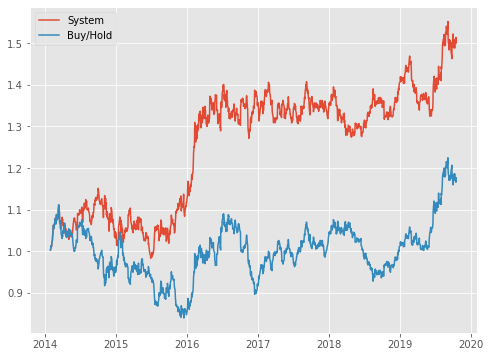

In [19]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    plt.plot(np.exp(gld.strat_return.cumsum()),label='System')
    plt.plot(np.exp(gld.Return.cumsum()), label='Buy/Hold')
    plt.legend()

### 7. Numerically

In [22]:
print("System total return: {:>10.2%}".format(np.exp(gld.strat_return.sum())))
print("Buy/Hold total return: {:>10.2%}".format(np.exp(gld.Return.sum())))

System total return:    150.08%
Buy/Hold total return:    117.61%
